In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set('paper',
        'white',
        rc={'font.size': 10,
            'axes.labelsize': 10,
            'legend.fontsize': 8,
            'axes.titlesize': 10,
            'xtick.labelsize': 8,
            'ytick.labelsize': 8,
            "pgf.rcfonts": False})

In [2]:
alpha_count = np.fromstring(
"""0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 2 25 4 5 12 5 5 2 9 6 6 5 6 3 1 0 27
0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 2 5 2 1 3 4 2 6 0 1 2 2 1 1 3 5
0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 1 2 3 1 5 1 3 5 3 4 3 2 1 0 3 2 6
0 0 0 0 0 0 0 0 1 0 1 0 2 2 2 1 0 6 4 6 5 4 1 2 6 3 1 3 2 0 0 0 9
0 0 0 0 0 0 0 0 0 1 2 2 1 3 4 2 0 9 3 7 2 10 6 1 9 3 3 1 7 1 0 5 6
0 0 0 0 0 0 0 0 0 0 2 1 4 1 2 2 0 12 9 11 9 2 7 6 12 3 3 6 4 1 0 3 4
0 0 0 0 0 0 0 0 2 0 0 3 4 1 5 4 4 20 17 19 12 10 9 4 9 2 5 2 0 0 1 2 4
0 1 0 0 0 0 0 0 0 0 2 5 4 9 5 9 3 35 21 34 16 18 12 5 17 7 5 1 1 1 2 4 3
2 0 0 0 0 0 0 0 2 1 5 8 19 27 31 31 8 213 140 124 99 72 68 30 61 9 17 7 24 4 5 5 26
0 0 1 0 0 0 0 0 2 3 12 27 29 47 49 92 28 126 109 106 105 41 43 21 25 15 3 5 8 5 0 1 3
1 0 0 0 0 0 0 0 0 3 21 57 91 127 205 301 122 683 515 288 289 149 129 44 89 26 21 20 24 8 4 3 21
0 0 0 1 1 0 0 1 9 13 25 162 488 678 1021 1307 1086 4949 3060 1503 1123 807 522 250 368 111 61 51 78 25 32 20 73
0 1 1 1 0 1 2 0 14 9 53 266 942 1218 2032 2748 2563 12271 6137 3048 2651 1152 807 284 463 103 83 72 96 33 22 23 99
1 0 0 1 1 2 0 3 14 14 30 247 1455 2815 4262 5785 9814 20952 10658 6350 2974 1137 608 194 322 69 38 31 56 16 19 14 75
0 0 0 1 0 0 0 1 17 18 68 418 3380 7826 12222 16233 39670 73373 39155 12229 4941 1410 731 225 460 85 55 34 67 22 10 17 130
0 0 0 0 1 0 1 0 14 15 98 712 6474 18558 36267 53214 98298 160419 39408 9463 3006 893 436 134 287 55 27 14 50 12 8 10 125
2 5 1 5 4 1 7 15 9 38 79 1066 12706 79757 255588 401575 0 43365 10433 2039 671 215 69 39 14 8 2 1 1 4 0 1 3
9 1 1 3 3 13 8 23 305 155 701 3624 24565 50439 166131 268374 20403 5653 2897 1255 646 315 166 61 50 39 16 21 14 3 13 9 34
4 1 3 0 2 8 15 32 148 122 500 2476 14588 28226 74251 47923 3840 2018 1131 484 231 115 55 15 35 20 7 11 13 7 11 15 28
0 3 0 1 5 5 11 34 111 144 390 2157 9525 14805 18817 10718 680 776 382 167 78 36 29 6 15 8 5 2 3 1 4 5 13
4 0 4 2 5 3 18 36 177 159 476 1666 7109 6145 7701 4257 220 338 217 91 38 18 14 7 11 7 5 5 5 1 0 5 5
3 0 2 1 0 11 15 46 135 133 255 1043 2799 2274 2579 1429 99 144 109 55 37 11 16 2 9 3 4 1 4 1 0 9 7
1 0 3 5 3 8 15 52 148 105 254 467 1760 1280 1833 838 38 60 84 29 36 10 22 6 12 1 4 2 3 2 2 2 14
0 0 0 2 5 4 6 18 54 71 74 174 658 560 569 342 25 23 24 20 7 5 9 3 3 1 1 0 0 2 1 3 1
10 5 6 10 10 12 21 25 166 46 82 283 972 952 1241 838 7 33 24 9 8 7 6 6 6 2 6 1 0 0 2 4 12
7 4 2 2 2 4 3 10 20 9 17 69 243 254 274 173 2 10 12 6 4 3 2 0 0 1 1 2 1 0 2 1 4
3 4 1 2 1 3 4 5 18 6 20 26 192 165 228 107 6 12 3 4 3 3 1 2 3 2 0 0 1 0 0 2 2
3 2 3 3 1 3 3 4 14 5 11 36 155 135 170 104 4 12 4 1 0 3 1 2 6 6 2 1 0 0 0 4 4
12 6 2 4 5 4 3 8 13 7 18 45 238 229 303 168 3 13 5 1 6 3 0 4 3 0 1 1 3 0 0 1 0
2 1 2 0 3 1 1 1 4 1 3 24 90 80 93 35 0 7 2 4 1 1 0 0 0 2 0 0 0 0 0 0 0
8 1 1 1 1 1 3 2 5 2 3 20 79 65 55 29 0 16 2 1 0 1 1 0 2 1 0 0 0 0 0 0 0
6 3 3 1 2 3 1 1 1 2 8 22 111 88 90 28 3 26 2 6 2 1 2 0 2 1 1 0 0 0 0 0 1
36 3 6 2 2 5 2 4 23 8 30 108 488 286 308 205 0 20 13 2 2 4 1 0 3 1 0 2 2 0 0 2 2""",
sep=' ', dtype=int).reshape((33,33))

In [3]:
def plot_pair_density(counts, name):
    alphas = np.arange(-16, 17) / 8
    prob = counts.clip(1) / counts.sum()
    print(np.log2(prob).min(), np.log2(prob).max())
    df = pd.DataFrame(np.log2(prob), index=alphas, columns=alphas)
    fig, ax = plt.subplots(figsize=(3, 3))
    sns.heatmap(df[::-1],
                ax=ax,
                cbar=False,
                square=True,
                xticklabels=2,
                yticklabels=2)
    plt.xlabel('Cb')
    plt.ylabel('Cr')
    plt.tight_layout()
    fig.savefig('%s.pgf' % name)

-21.2064122611 -2.59110232939


(0.57439712190792303, 1.3161285247691728e-96)

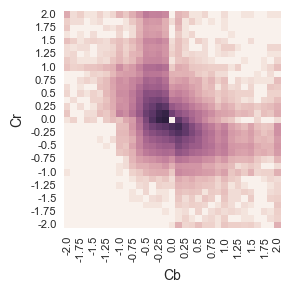

In [4]:
plot_pair_density(alpha_count, 'uv_alpha_raw_prob')
stats.pearsonr(alpha_count.ravel(), alpha_count.T.ravel())

In [5]:
alpha_norm = alpha_count.astype(float)
alpha_norm[:16,:16] /= alpha_norm[:16,:16].sum()
alpha_norm[17:,:16] /= alpha_norm[17:,:16].sum()
alpha_norm[:16,17:] /= alpha_norm[:16,17:].sum()
alpha_norm[17:,17:] /= alpha_norm[17:,17:].sum()
alpha_norm[:16,16] /= alpha_norm[:16,16].sum()
alpha_norm[17:,16] /= alpha_norm[17:,16].sum()
alpha_norm[16,:16] /= alpha_norm[16,:16].sum()
alpha_norm[16,17:] /= alpha_norm[16,17:].sum()
alpha_norm *= alpha_count.sum()

-24.2064122611 -3.31206577942


(0.98244845809202397, 0.0)

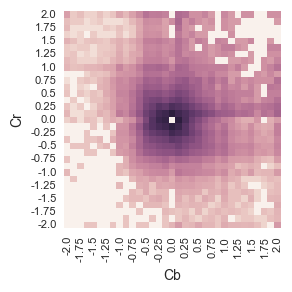

In [6]:
plot_pair_density(alpha_norm, 'uv_alpha_norm_prob')
stats.pearsonr(alpha_norm.ravel(), alpha_norm.T.ravel())

-24.2064122611 -3.35099790488


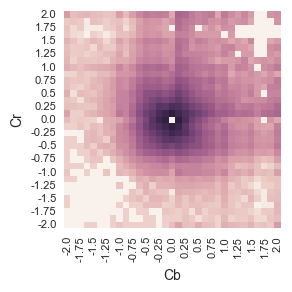

In [7]:
alpha_norm_symm = (alpha_norm + alpha_norm.T) * .5
plot_pair_density(alpha_norm_symm, 'uv_alpha_symm_prob');

-24.1799154075 -3.32450105125


(0.99901694296377475, 0.0)

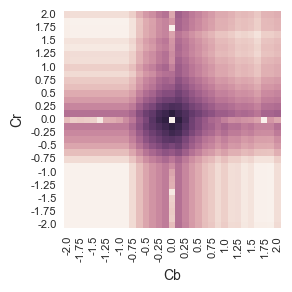

In [8]:
ones_16x16 = np.ones((16, 16))
t = alpha_norm_symm.copy()
for quadrant in [t[:16, :16], t[17:, :16], t[:16, 17:], t[17:, 17:]]:
    def cost_t(x):
        x = x.clip(1)
        v = (x[:16] * ones_16x16).T * x[16:]
        return ((quadrant - v)**2).sum()
    x0 = np.hstack((quadrant.mean(axis=1), quadrant.mean(axis=0)))
    x0 *= np.sqrt(quadrant.sum() / ((x0[:16] * ones_16x16).T * x0[16:]).sum())
    x0 = optimize.fmin(cost_t, x0, maxfun=100000, disp=False).clip(1)
    quadrant[:, :] = (x0[:16] * ones_16x16).T * x0[16:]
alpha_norm_symm_1d = (t + t.T) * .5
plot_pair_density(alpha_norm_symm_1d, 'uv_alpha_1d')
stats.pearsonr(alpha_norm_symm.ravel(), alpha_norm_symm_1d.ravel())

In [9]:
alpha_model = alpha_norm_symm_1d.copy()
alpha_model[:16,:16] *= alpha_count[:16,:16].sum() / alpha_norm[:16,:16].sum()
alpha_model[17:,:16] *= alpha_count[17:,:16].sum() / alpha_norm[17:,:16].sum()
alpha_model[:16,17:] *= alpha_count[:16,17:].sum() / alpha_norm[:16,17:].sum()
alpha_model[17:,17:] *= alpha_count[17:,17:].sum() / alpha_norm[17:,17:].sum()
alpha_model[:16,16] *= alpha_count[:16,16].sum() / alpha_norm[:16,16].sum()
alpha_model[17:,16] *= alpha_count[17:,16].sum() / alpha_norm[17:,16].sum()
alpha_model[16,:16] *= alpha_count[16,:16].sum() / alpha_norm[16,:16].sum()
alpha_model[16,17:] *= alpha_count[16,17:].sum() / alpha_norm[16,17:].sum()

-21.1546147714 -2.393704313


(0.99207068109621788, 0.0)

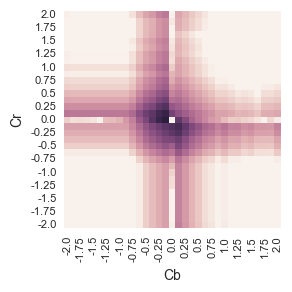

In [10]:
plot_pair_density(alpha_model, 'uv_alpha_model');
stats.pearsonr(alpha_count.ravel(), alpha_model.ravel())

In [11]:
raw_rate = np.sum(alpha_count*-np.log2(alpha_count.clip(1)/alpha_count.sum()))
model_rate = np.sum(alpha_count*-np.log2(alpha_model.clip(1)/alpha_model.sum()))
model_rate / raw_rate - 1

0.019532200143253631

-21.2064122611 -3.14956585544


(0.89339048645475849, 0.0)

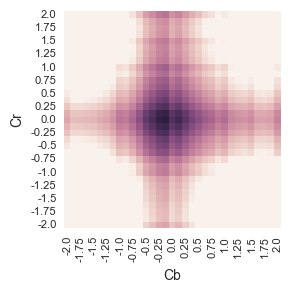

In [12]:
alpha_ortho = (alpha_count.mean(axis=1) * np.ones((33, 33))).T * alpha_count.mean(axis=0)
# alpha_ortho[16,16] = 0
alpha_ortho *= alpha_count.sum() / alpha_ortho.sum()
plot_pair_density(alpha_ortho, 'uv_alpha_ortho');
stats.pearsonr(alpha_count.ravel(), alpha_ortho.ravel())

In [13]:
raw_rate = np.sum(alpha_count*-np.log2(alpha_count.clip(1)/alpha_count.sum()))
ortho_rate = np.sum(alpha_count*-np.log2(alpha_ortho.clip(1)/alpha_ortho.sum()))
ortho_rate / raw_rate - 1

0.098563239301608929

In [14]:
ortho_rate / model_rate - 1

0.077516962335520967